# **지도학습**
데이터를 주고 뭐가 뭔지 알아내는 방법

# **분류**

데이터가 어느 범주에 있는지 판단하는 기법


> 이항 분류

범주가 2개 <font size="2em" color="gray">( ex) 개와 고양이 분류 )</font>



> pandas

xls, xlsx, csv, tsv 등의 확장자를 가진 파일을 파이썬으로 불러오는 모듈

**데이터만 보고 와인을 분류하는 신경망을 만들어봅시다.**

In [ ]:
# 데이터 불러오기
# 캘리포니아 어바인 대학에서 제공

# 모듈 불러오기
import pandas as pd

#csv 파일 읽기
red=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

#2개의 나눠진 파일을 하나로 합치기
#와인이 레드와인인지 화이트와인인지 라벨링을 해줘야 함
red['type']=0
white['type']=1
print(red.head(2))
print(white.head(2))

#데이터의 입력이 성공적인지 확인하기
#descibe를 통해 간단한 통계 정보 확인
wine=pd.concat([red,white])
print(wine.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

데이터 속성 정리<br>
<font size="2em" color="gray">
fixed acidity<br>
volatile acidity<br>
cirtic acid<br>
residual sugar<br>
chlorides<br>
free sulfur dioxide<br>
total sulfur dioxide<br>
density<br>
pH<br>
sulphates<br>
alcohol<br>
quality<br>
</font>



> 정규화 (Normalization)

 최대 최소 정규화 : 모든 값들을 0부터 1사이 값으로 변환

<br>
<br>

**딥러닝 시작 전 체크해야 할 사실들!**
 <br><br>
 1 | 데이터 균형 맞추기

```
 import matplotlib.pyplot as plt
 plt.hist(wine['type'])
 plt.xticks([0,1])
 plt.show()

 print(wine['type'].value_counts())

```
 <font size="2em" color="gray">
 확인해보면 화이트 와인이 레드 와인보다 무려 3배가 많기 때문에 수 균형을 맞추어야 한다.
 </font>
 <br><br>
 2 | 데이터 형식 확인

```
wine.info()
```
 <font size="2em" color="gray">
 전부 float64형으로 모두 숫자니까 다루기 쉽다.
 </font>

In [ ]:
# 정규화
wine_norm = (wine-wine.min())/(wine.max()-wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [ ]:
# 정규화된 데이터를 랜덤하게 섞고, 넘파이 배열로 변환

# 모듈 불러오기
import numpy as np

wine_shuffle = wine_norm.sample(frac=1) #frac 비율만큼 행을 랜덤하게 뽑아서 새로운 데이터 프레임 제작
wine_np = wine_shuffle.to_numpy() #넘파이 배열 제작
print(wine_np[:5])

[[0.32231405 0.05333333 0.29518072 0.02147239 0.07807309 0.06597222
  0.2718894  0.14825525 0.46511628 0.15168539 0.39130435 0.5
  1.        ]
 [0.29752066 0.44       0.04216867 0.01687117 0.12790698 0.04861111
  0.09677419 0.15249663 0.31007752 0.14606742 0.28985507 0.33333333
  0.        ]
 [0.20661157 0.12       0.25301205 0.09969325 0.05980066 0.21180556
  0.46774194 0.16059379 0.37209302 0.1741573  0.2173913  0.5
  1.        ]
 [0.59504132 0.08       0.28915663 0.02147239 0.55481728 0.01736111
  0.02764977 0.20802005 0.4496124  0.2752809  0.36231884 0.33333333
  0.        ]
 [0.2892562  0.09333333 0.22289157 0.2101227  0.089701   0.16319444
  0.42626728 0.20609215 0.13178295 0.08988764 0.14492754 0.5
  1.        ]]




> 원-핫 인코딩

정답에 해당하는 인덱스에는 1을, 나머지에는 0을 넣는 방식

In [ ]:
# 데이터 분배 (훈련 데이터, 테스트 데이터)

#모듈 불러오기
import tensorflow as tf

#훈련 데이터를 전체의 80% 분배
train_idx=int(len(wine_np)*0.8)
train_x,train_y=wine_np[:train_idx,:-1],wine_np[:train_idx,-1]
test_x,test_y=wine_np[train_idx:,:-1],wine_np[train_idx:,-1]

#y를 원-핫 인코딩 방식으로 바꾼다
train_y=tf.keras.utils.to_categorical(train_y,num_classes=2)
test_y=tf.keras.utils.to_categorical(test_y,num_classes=2)



> softmax 함수

활성화 함수 중 하나로, 최대값을 강조하고 싶기는 한데 극단적으로 하고 싶지는 않은 경우 사용한다.
<br>
주로 출력층에서 사용한다!<br>
이럴때는 정답에 대한 확률로서 작용한다. <br>

$$y_k = {exp(a_k)}/{\sum_{i=1}^{n}(exp(a_i))}$$



> categorical_crossentropy

손실 함수 중 하나로, 범주에 쓰이는 분류에 자주 사용한다.<br>
원-핫 인코딩에서 사용하는 손실함수이다.

$$CCE = - (1/n) * {\sum_{j=1}^{n}{p(x)}{log{q(x)}}}$$

 <font size="2em" color="gray">
 sparse_categorical_crossentropy : 위와 동일한 손실함수이지만, 원-핫 인코딩이 아닐 때만 사용할 수 있다.
  </font>

In [ ]:
import tensorflow as tf

model=tf.keras.Sequential([    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
   tf.keras.layers.Dense(units=24, activation='relu'), 
   tf.keras.layers.Dense(units=12, activation='relu'),
   tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.07),
            loss='categorical_crossentropy', metrics=['accuracy'])
#컴파일 할 때 정확도 설정

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                624       
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)
#validation_split : 테스트 데이터셋 비율 설정

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9926 - val_loss: 0.1139 - val_accuracy: 0.9915
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9936 - val_loss: 0.0758 - val_accuracy: 0.9946
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9928 - val_loss: 0.0675 - val_accuracy: 0.9892
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9926 - val_loss: 0.0744 - val_accuracy: 0.9838
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9908 - val_loss: 0.0591 - val_accuracy: 0.9938
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9928 - val_loss: 0.0595 - val_accuracy: 0.9938
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9926 - val_loss: 0.0523 - val_accuracy: 0.9946
Epoch 

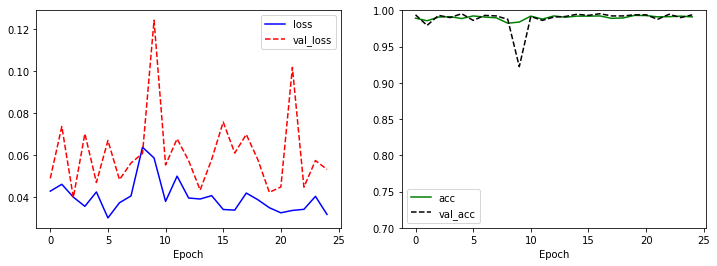

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

#1번째 그래프
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

#2번째 그래프
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='acc')
plt.plot(history.history['val_accuracy'],'k--',label='val_acc')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

**분석 결과**
<br>
 손실 값은 줄어들지만 테스트의 손실 값은 그렇지 않으며, 정확도는 학습 데이터와 테스트 데이터 둘 다 늘어난다